In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Dhaka Rent (1).csv")
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    60 non-null     int64
 1   rent    60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [4]:
df.isnull().sum()

area    0
rent    0
dtype: int64

In [5]:
df[['area']].head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [6]:
df.head(4)

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100


In [7]:
df.tail(4)

,area,rent
56,2750,48500
57,1800,25100
58,2200,31560
59,3100,51600


In [8]:
df['area'].head()

0    2000
1    2100
2    2500
3    2250
4    3000
Name: area, dtype: int64

In [9]:
df.shape

(60, 2)

In [10]:
df.corr()

,area,rent
area,1.000000,0.974807
rent,0.974807,1.000000


Text(0, 0.5, 'RENT')

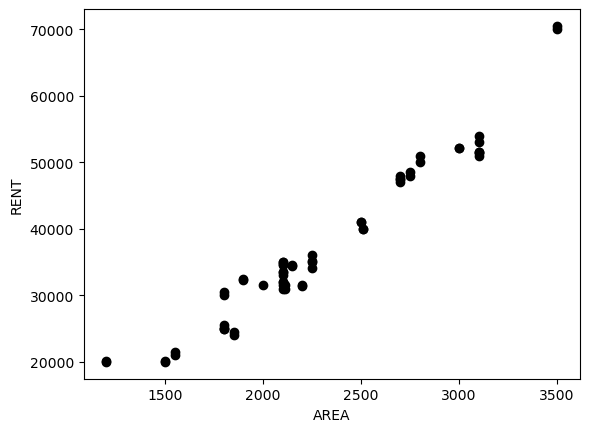

In [11]:
plt.scatter(df.area, df.rent, marker='o', color='black')
plt.xlabel('AREA')
plt.ylabel('RENT')

In [12]:
df.area.mean()

2289.0

In [13]:
df.rent.mean()

37269.166666666664

In [14]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [15]:
x = df.drop('rent', axis=1)
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [16]:
y = df.drop('area', axis=1)
y.head()

,rent
0,31500
1,35000
2,41050
3,36100
4,52100


Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
reg = LinearRegression()

In [19]:
reg.fit(x,y)

LinearRegression()

In [20]:
reg.coef_

array([[21.29266147]])

In [21]:
reg.intercept_

array([-11469.73544643])

In [22]:
reg.predict([[2000]])

array([[31115.58750079]])

In [23]:
# y = mx+c
(reg.coef_ * 2000) + (reg.intercept_)

array([[31115.58750079]])

In [24]:
df['residuals'] = df[['rent']] - reg.predict(x)
df.head()

,area,rent,residuals
0,2000,31500,384.412499
1,2100,35000,1755.146352
2,2500,41050,-711.918238
3,2250,36100,-338.752869
4,3000,52100,-308.248974


In [25]:
df['predict'] = reg.predict(x)
df.head()

,area,rent,residuals,predict
0,2000,31500,384.412499,31115.587501
1,2100,35000,1755.146352,33244.853648
2,2500,41050,-711.918238,41761.918238
3,2250,36100,-338.752869,36438.752869
4,3000,52100,-308.248974,52408.248974


Text(0, 0.5, 'RENT')

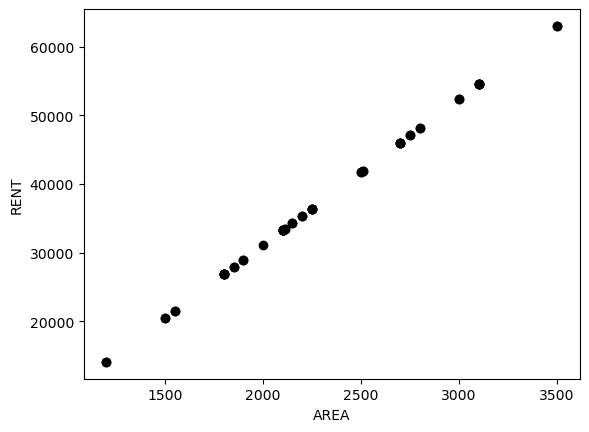

In [26]:
plt.scatter(df.area, df.predict, marker= 'o', color='black')
plt.xlabel('AREA')
plt.ylabel('RENT')

Text(0, 0.5, 'RENT')

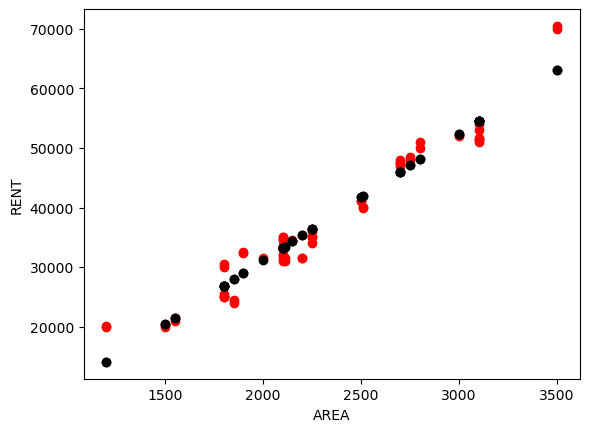

In [27]:
plt.scatter(df.area, df.rent, marker='o', color='red')
plt.scatter(df.area, df.predict, marker='o', color='black')
plt.xlabel('AREA')
plt.ylabel('RENT')

Text(0, 0.5, 'RENT')

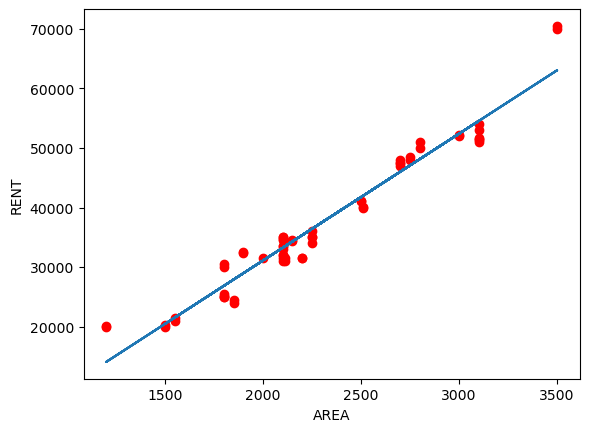

In [28]:
plt.scatter(df.area, df.rent, marker='o', color='red')
plt.plot(df.area, df.predict)
plt.xlabel('AREA')
plt.ylabel('RENT')

In [29]:
reg.predict([[3000]])

array([[52408.2489744]])

MSE

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [31]:
mse = mean_squared_error(df['rent'] , df['predict'])
mse

6778077.204095561

In [32]:
mean_absolute_error(df['rent'] , df['predict'])

2009.8695093576282

In [33]:
import math
math.sqrt(mse)

2603.474064417689

Accuracy

In [34]:
reg.score(x,y)

0.950249380357677

#Train Test Split

In [35]:
from sklearn.model_selection import train_test_split as tts

In [36]:
xtrain,  xtest,  ytrain, ytest=tts(x,y)

In [37]:
len(xtrain)

45

In [38]:
len(xtest)

15

In [39]:
xtrain,  xtest,  ytrain, ytest=tts(x , y, test_size=.30)

In [40]:
xtrain.head()

,area
10,2150
44,2250
29,3100
6,1500
25,3100


In [41]:
ytrain.head()

,rent
10,34500
44,35000
29,51400
6,20000
25,53000


In [42]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [43]:
reg.score(xtest, ytest)

0.9324043273699516

In [44]:
reg.score(xtrain, ytrain)

0.95205903811437

TRAIN TEST VALIDATION

In [50]:
xtrain,  xtest,  ytrain, ytest = tts(x , y, test_size=.40, random_state=1)

In [51]:
xtrain.shape

(36, 1)

In [47]:
xtest.shape

(24, 1)

In [52]:
xtest,  xval, ytest, yval =tts(xtest, ytest, test_size=.50, random_state=1)

In [53]:
xtest.shape

(12, 1)

In [54]:
xval.shape

(12, 1)